In [1]:
from sympy import *
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# def sec(C):
#     sec = 1/2 * (trace(C)**2 - trace(C**2))
#     return sec

In [3]:
# Identity tensor
I = eye(3)

# Direction vector
e1 = I[:,0]
e2 = I[:,1]
e3 = I[:,2]

In [4]:
# Dilatation coefficients (Poisson's ratio:https://en.wikipedia.org/wiki/Poisson%27s_ratio - Length change)
u, Nu, Mu   = symbols(r'u \nu \mu', positive=True)

LambdaH = 1             # Coefficient for homogeneous dilatation
LambdaX = u **(-Nu)     # Coefficient for lengthening in e1 direction (here <1)
LambdaY = u **(-Nu)     # Coefficient for lengthening in e2 direction (here <1)
LambdaZ = u             # Coefficient for lengthening in e3 direction (here >1)

In [5]:
# Deformation matrices
U = I + (LambdaX-1) * np.outer(e1,e1) + (LambdaY-1) * np.outer(e2,e2) + (LambdaZ-1) * np.outer(e3,e3)

# Gradient of the deformation
F = (LambdaH-1) * I + U

# Right Cauchy-Green strain tensor
C = transpose(F) * F

In [6]:
# Eigenvalues of Right Cauchy-Green strain tensor
Lambda1, Lambda2, Lambda3 = symbols(r'\lambda_1 \lambda_2 \lambda_3')

# Invariants
J = Function('J')(Lambda1,Lambda2,Lambda3)
JFunction = Lambda1*Lambda2*Lambda3

I1 = Function('I_1')(Lambda1,Lambda2,Lambda3)
I1Function = Lambda1**2+Lambda2**2+Lambda3**2

I2 = Function('I_2')(Lambda1,Lambda2,Lambda3)
I2Function = Lambda1**2*Lambda2**2 + Lambda2**2*Lambda3**2 + Lambda3**2*Lambda1**2

# Hyperelastic models (compressible)

# Neo-Hookean
C1, D1 = symbols(r'C_{1} D_{1}', positive=True)
C1Function  = Mu / 2
D1Function  = Mu*Nu / (1 - 2*Nu)
Psi_NH = C1 * (J**Rational(-2,3)*I1 - 3) + D1 * (J-1)**2

Psis = [Psi_NH]
Psi  = Psis[0]
display(Psi)

C_{1}*(I_1(\lambda_1, \lambda_2, \lambda_3)/J(\lambda_1, \lambda_2, \lambda_3)**(2/3) - 3) + D_{1}*(J(\lambda_1, \lambda_2, \lambda_3) - 1)**2

In [7]:
# Derivative with respect to Lambdas (https://en.wikipedia.org/wiki/Hyperelastic_material: compressible isotropic hyperelastic material)
Psi = Psi.subs({J:JFunction,I1:I1Function})

T1 = Lambda1*Derivative(Psi, Lambda1)/(Lambda1*Lambda2*Lambda3)
T1 = T1.doit()

T2 = Lambda2*Derivative(Psi, Lambda2)/(Lambda1*Lambda2*Lambda3)
T2 = T2.doit()

T3 = Lambda3*Derivative(Psi, Lambda3)/(Lambda1*Lambda2*Lambda3)
T3 = T3.doit()

T = T1 * np.outer(e1,e1) + T2 *np.outer(e2,e2) + T3 * np.outer(e3,e3)     # Add the pressure p for incompressibility
T = Matrix(T).doit()
T = T.subs({JFunction:J,I1Function:I1})
T = simplify(T)
T = T.subs({JFunction:J,I1Function:I1})
T = T.subs({J:'J',I1:'I_1'})
display(T)

Matrix([
[(2*C_{1}*(-I_1 + 3*\lambda_1**2) + 6*D_{1}*J**(5/3)*(J - 1))/(3*J**(5/3)),                                                                         0,                                                                         0],
[                                                                        0, (2*C_{1}*(-I_1 + 3*\lambda_2**2) + 6*D_{1}*J**(5/3)*(J - 1))/(3*J**(5/3)),                                                                         0],
[                                                                        0,                                                                         0, (2*C_{1}*(-I_1 + 3*\lambda_3**2) + 6*D_{1}*J**(5/3)*(J - 1))/(3*J**(5/3))]])

In [8]:
# Replace invariants
T = T.subs({'J':JFunction,'I_1':I1Function})
display(T)
# Replace material constants
T = T.subs({C1:C1Function,D1:D1Function})
display(T)
# Replace Eingenvalues
Lambdas = C.eigenvals()
Lambdas = list(Lambdas)
T = T.subs({Lambda1:Lambdas[0], Lambda2:Lambdas[0], Lambda3:Lambdas[1]})
display(T)
# T11 and T22 is null
T = T - T[0,0] * I
T = simplify(T)
display(T)

Matrix([
[(2*C_{1}*(2*\lambda_1**2 - \lambda_2**2 - \lambda_3**2) + 6*D_{1}*(\lambda_1*\lambda_2*\lambda_3)**(5/3)*(\lambda_1*\lambda_2*\lambda_3 - 1))/(3*(\lambda_1*\lambda_2*\lambda_3)**(5/3)),                                                                                                                                                                                         0,                                                                                                                                                                                         0],
[                                                                                                                                                                                       0, (2*C_{1}*(-\lambda_1**2 + 2*\lambda_2**2 - \lambda_3**2) + 6*D_{1}*(\lambda_1*\lambda_2*\lambda_3)**(5/3)*(\lambda_1*\lambda_2*\lambda_3 - 1))/(3*(\lambda_1*\lambda_2*\lambda_3)**(5/3)),                                                        

Matrix([
[(6*\mu*\nu*(\lambda_1*\lambda_2*\lambda_3)**(5/3)*(\lambda_1*\lambda_2*\lambda_3 - 1)/(1 - 2*\nu) + \mu*(2*\lambda_1**2 - \lambda_2**2 - \lambda_3**2))/(3*(\lambda_1*\lambda_2*\lambda_3)**(5/3)),                                                                                                                                                                                                   0,                                                                                                                                                                                                   0],
[                                                                                                                                                                                                 0, (6*\mu*\nu*(\lambda_1*\lambda_2*\lambda_3)**(5/3)*(\lambda_1*\lambda_2*\lambda_3 - 1)/(1 - 2*\nu) + \mu*(-\lambda_1**2 + 2*\lambda_2**2 - \lambda_3**2))/(3*(\lambda_1*\lambda_2*\lambda_3)**(5/3)),      

Matrix([
[u**(20*\nu/3)*(6*\mu*\nu*u**(10/3)*u**(-20*\nu/3)*(u**2*u**(-4*\nu) - 1)/(1 - 2*\nu) + \mu*(-u**4 + u**(-4*\nu)))/(3*u**(10/3)),                                                                                                                               0,                                                                                                                                  0],
[                                                                                                                              0, u**(20*\nu/3)*(6*\mu*\nu*u**(10/3)*u**(-20*\nu/3)*(u**2*u**(-4*\nu) - 1)/(1 - 2*\nu) + \mu*(-u**4 + u**(-4*\nu)))/(3*u**(10/3)),                                                                                                                                  0],
[                                                                                                                              0,                                                                              

Matrix([
[0, 0,                                            0],
[0, 0,                                            0],
[0, 0, \mu*u**(8*\nu/3 - 10/3)*(u**(4*\nu + 4) - 1)]])

In [9]:
# Other stresses
J = det(F)                                    # Volume change
P = J * T * F.inv().transpose()               # Nominal stress
S = J * F.inv() * T * F.inv().transpose()     # Material stress
display(S)

Matrix([
[0, 0,                                                          0],
[0, 0,                                                          0],
[0, 0, \mu*u**(-2*\nu)*u**(8*\nu/3 - 10/3)*(u**(4*\nu + 4) - 1)/u]])

In [10]:
# Define axial responses
NH = lambdify((Nu, Mu, u), P[2,2], 'numpy')

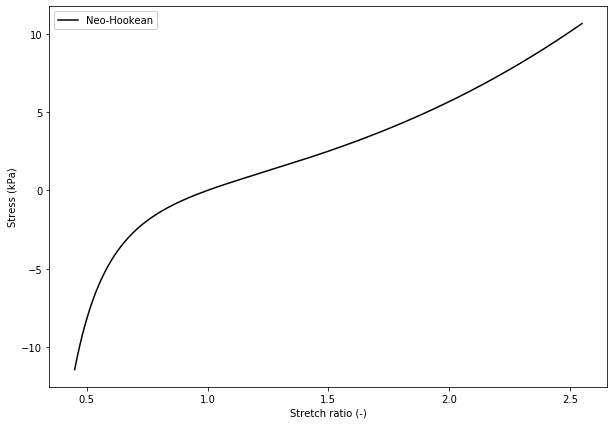

In [11]:
# Plot Results

NuV = 0.4
MuV = 1

Xmin = 0.45
Xmax = 2.55
Delta = 0.01
U33 = np.linspace(Xmin,Xmax,int((Xmax-Xmin)/Delta+1))

plt.rc('figure', figsize=[10,7])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.cla()
ax.plot(U33, NH(NuV, MuV, U33),  color = 'k', linestyle = '-', label='Neo-Hookean')
# ax.plot(U33, MR(Nu,U33),  color = 'g', linestyle = '-', label='Mooney-Rivlin')
# ax.plot(U33, Gn(Nu,U33),  color = 'b', linestyle = '-', label='Gent')
# ax.plot(U33, Dm(Nu,U33),  color = 'c', linestyle = '-', label='Demiray')
# ax.plot(U33, Og(Nu,U33),  color = 'r', linestyle = '-', label='Ogden')
ax.set_xlabel('Stretch ratio (-)')
ax.set_ylabel('Stress (kPa)')
# plt.xlim([0.8, 1.2])
# plt.ylim([1, 3])
plt.legend(loc='upper left', frameon=True, framealpha=1)
plt.show()